<a href="https://colab.research.google.com/github/umairiqbal78/Deep-learning-examples/blob/master/umair_vs_salman_cnn_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [ ]:
original_dataset_dir = '/content/drive/My Drive/friends/orignal_images'
base_dir = '/content/drive/My Drive/friends'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_umair_dir = os.path.join(train_dir, 'umair')
train_salman_dir = os.path.join(train_dir, 'salman')
validation_umair_dir = os.path.join(validation_dir, 'umair')
validation_salman_dir = os.path.join(validation_dir, 'salman')

In [ ]:
print('total training umair images:', len(os.listdir(train_umair_dir)))
print('total training salman images:', len(os.listdir(train_salman_dir)))
print('total validation umair images:', len(os.listdir(validation_umair_dir)))
print('total validation salman images:', len(os.listdir(validation_salman_dir)))

total training umair images: 400
total training salman images: 400
total validation umair images: 5
total validation salman images: 5


/content/drive/My Drive/friends/orignal_images/26.JPG


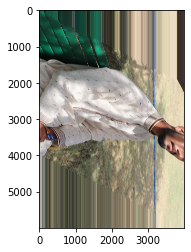

In [ ]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[0])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

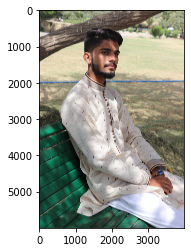

In [ ]:
plt.imshow(img);

In [ ]:
umair_files = ['{}-.JPG'.format(i) for i in range(1, 26)]
data_generator = ImageDataGenerator()
for file in umair_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_umair_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_umair_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_umair_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_umair_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_umair_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

        
salman_files = ['{}-.JPG'.format(i) for i in range(26, 51)]
data_generator = ImageDataGenerator()
for file in salman_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_salman_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
train_datagen =  ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=16, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=5, class_mode='binary')

Found 800 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
[1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]


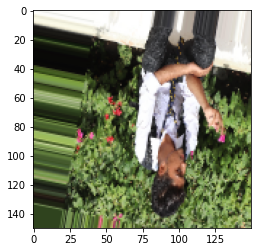

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    plt.imshow(data_batch[1])
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

In [ ]:
history = model.fit(train_generator,steps_per_epoch=16,epochs=16,validation_data=validation_generator,validation_steps=5)

Epoch 1/16
16/16 [==============================] - 128s 8s/step - loss: 0.6487 - acc: 0.6250
Epoch 2/16
16/16 [==============================] - 100s 6s/step - loss: 0.5869 - acc: 0.7109
Epoch 3/16
16/16 [==============================] - 87s 5s/step - loss: 0.5806 - acc: 0.7070
Epoch 4/16
16/16 [==============================] - 76s 5s/step - loss: 0.5606 - acc: 0.7070
Epoch 5/16
16/16 [==============================] - 73s 5s/step - loss: 0.5487 - acc: 0.7578
Epoch 6/16
16/16 [==============================] - 68s 4s/step - loss: 0.4939 - acc: 0.7578
Epoch 7/16
16/16 [==============================] - 66s 4s/step - loss: 0.4747 - acc: 0.7656
Epoch 8/16
16/16 [==============================] - 62s 4s/step - loss: 0.4362 - acc: 0.8125
Epoch 9/16
16/16 [==============================] - 63s 4s/step - loss: 0.5224 - acc: 0.7422
Epoch 10/16
16/16 [==============================] - 65s 4s/step - loss: 0.4513 - acc: 0.8125
Epoch 11/16
16/16 [==============================] - 61s 4s/step - 

In [ ]:
modelStoragePath = "drive/My Drive/"

import pickle
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_umair_vs_salman" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_umair_vs_salman" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_umair_vs_salman" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_umair_vs_salman" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [ ]:
print(type(history))
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

<class 'dict'>


AttributeError: ignored

In [ ]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
loss = history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


AttributeError: ignored